# Setup

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load Vector Data

```
set gmu-buildings gis:load-dataset "data/Campus_data/Mason_bld.shp"

set gmu-walkway gis:load-dataset "data/Campus_data/Mason_walkway_line.shp"

set world-size gis:load-dataset "data/Campus_data/world.shp"
```

In [2]:
gmu_buildings = gpd.read_file("../data/raw/campus/Mason_bld.shp").set_index("Id")
gmu_buildings["centroid"] = gmu_buildings["geometry"].centroid
gmu_buildings

/var/folders/x9/b96ywfds44db4d1fc3z0z51h0000gn/T/ipykernel_60060/1605866093.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gmu_buildings["centroid"] = gmu_buildings["geometry"].centroid


,NAME,function,geometry,centroid
Id,,,,
1,GEORGE W. JOHNSON CENTER,1.0,"POLYGON ((11822517.11166 6987684.10842, 118225...",POINT (11822640.59876 6987512.56961)
2,DAVID KING HALL,1.0,"POLYGON ((11822800.55434 6987724.17504, 118227...",POINT (11822864.48326 6987750.86550)
3,SCIENCE AND TECH I,1.0,"POLYGON ((11823106.15955 6987428.08606, 118230...",POINT (11823017.54177 6987488.48250)
4,SCIENCE AND TECH II,1.0,"POLYGON ((11823144.77700 6987485.86687, 118231...",POINT (11823215.09805 6987415.04893)
5,ENTERPRISE HALL,1.0,"POLYGON ((11822946.56417 6987144.44857, 118229...",POINT (11823075.80655 6987192.06649)
...,...,...,...,...
57,CROSS COTTAGE,NaN,"POLYGON ((11821649.40986 6987068.51409, 118216...",POINT (11821650.18988 6987061.54372)
58,CENTER FOR STUDENT ENGAGEMENT (SUB II),NaN,"POLYGON ((11823355.05141 6987869.56873, 118233...",POINT (11823386.85056 6987773.89599)
59,SANDY CREEK PARKING DECK,NaN,"POLYGON ((11823486.80798 6987357.73456, 118234...",POINT (11823535.36021 6987128.52445)


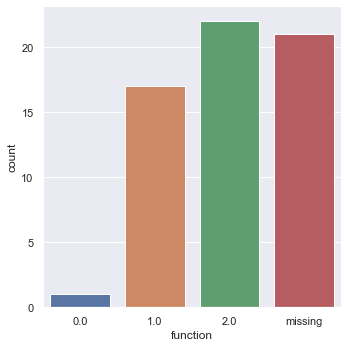

In [3]:
sns.catplot(x="function", data=gmu_buildings.sort_values(by="function").fillna("missing"), kind="count")

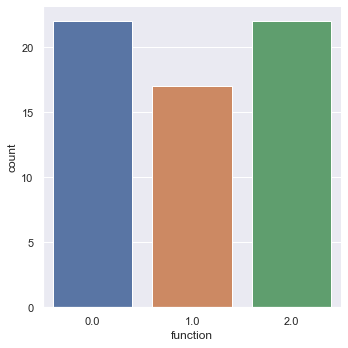

In [4]:
# following the netlogo model, fill na with 0.0
gmu_buildings["function"].fillna(0.0, inplace=True)
sns.catplot(x="function", data=gmu_buildings.sort_values(by="function"), kind="count")

In [5]:
gmu_walkway = gpd.read_file("../data/raw/campus/Mason_walkway_line.shp").set_index("Id")
gmu_walkway

,geometry
Id,
0,"LINESTRING (11822464.14699 6988476.89551, 1182..."
0,"LINESTRING (11822594.10614 6988242.26927, 1182..."
0,"LINESTRING (11822329.18942 6988193.98445, 1182..."
0,"LINESTRING (11822698.07345 6987962.35727, 1182..."
0,"LINESTRING (11822695.07439 6987952.56035, 1182..."
...,...
0,"LINESTRING (11823370.26496 6987341.02044, 1182..."
0,"LINESTRING (11823370.26496 6987341.02044, 1182..."
0,"LINESTRING (11822149.47828 6987062.23034, 1182..."


In [6]:
world_size = gpd.read_file("../data/raw/campus/world.shp").set_index("Id")
world_size

,geometry
Id,
0,"POLYGON ((11821007.29556 6989187.46574, 118265..."


## Affine Transformation

In [7]:
world_size.bounds

,minx,miny,maxx,maxy
Id,,,,
0,1.182101e+07,6.986199e+06,1.182658e+07,6.989187e+06


In [7]:
netlogo_min_pxcor, netlogo_max_pxcor = 0, 79
netlogo_min_pycor, netlogo_max_pycor = 0, 39